## Task: According to this data, how many searches does the keyword with rank 1 receive for each search engine?

$\;\;\;\;\;\;$ 


* Keyword with Rank 1: This refers to the specific keyword or set of keywords that have been ranked as the top keyword(s) in the dataset.

* Number of Searches: How many searches are associated with the keyword(s) that hold the top rank (rank 1).

* For Each Search Engine: The analysis needs to be performed separately for each search engine. This means breaking down the total number of searches for the keyword with rank 1 based on the different search engines present in the dataset.

&nbsp;

### Load data & libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [49]:
data= pd.read_csv('case_study_junior_ds.csv')
data

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0
...,...,...,...,...,...
469303,283467963549,1396,2022-07-14,13000,25
469304,678604970059,5133,2022-07-14,3000,25
469305,2482491145775,3980,2022-07-14,7000,25
469306,2791728932601,6522,2022-07-14,1357,25


 Data: the dataset includes keywords, identified by their keyword_id, their rank of most searched to least, the date of the search, the number of searches for each keyword, and the research engine used. 


### 1. Exploratory Data Analysis


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   keyword_id     469308 non-null  int64 
 1   keyword_rank   469308 non-null  int64 
 2   date           469308 non-null  object
 3   searches       469308 non-null  int64 
 4   search_engine  469308 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.9+ MB


In [51]:
data.describe()

,keyword_id,keyword_rank,searches,search_engine
count,4.693080e+05,4.693080e+05,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,8.550373e+03,6.818188
std,1.290018e+12,1.388063e+06,8.279563e+04,5.185202
min,5.850000e+03,3.000000e+00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,1.863716e+07,25.000000


In [52]:
data['search_engine'].value_counts()

search_engine
4     86060
0     46725
3     41559
1     33154
5     29504
11    27478
7     26355
10    25328
6     24541
9     23093
8     22547
13    19609
12    11687
14    11685
15     9850
16     7355
19     5117
18     4883
20     2931
24     2556
21     2528
17     1652
25     1516
22     1001
2       441
23      153
Name: count, dtype: int64

##### Let's check number of unique values in the dataset

In [53]:
for i in list(data.columns):
    print(f'Unique {i}: {data[i].nunique()}')

Unique keyword_id: 109143
Unique keyword_rank: 359306
Unique date: 7
Unique searches: 24158
Unique search_engine: 26


##### Check for missing values

In [54]:
data.isnull().sum()

keyword_id       0
keyword_rank     0
date             0
searches         0
search_engine    0
dtype: int64

##### Check date range of dataset

In [55]:
print(f"Min Date: {data['date'].min()}")
print(f"Max Date: {data['date'].max()}")

Min Date: 2022-07-08
Max Date: 2022-07-14


### First impression:

-  We have a relatively clean dataset with no missing values
-  Search engine is a categorical variable with 26 values
-  The data is during one week period (if we check what day was the  2022-07-08: Friday, 2022-07-14: Thurday)

### 2. Data Visualisation
#### working with one variable at a time and then exploring relationships between the features

Since the goal here is to determine how many sewarches does key word with rank 1 receive per search engine, we can start by exploring the distribution of 'keyword_rank'

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


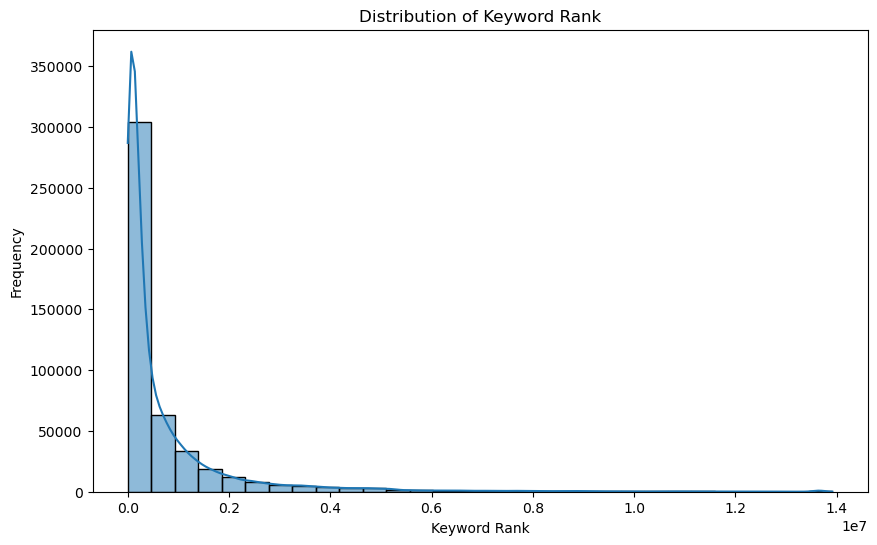

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data['keyword_rank'], bins=30, kde=True)
plt.title('Distribution of Keyword Rank')
plt.xlabel('Keyword Rank')
plt.ylabel('Frequency')
plt.show()

The distribution is skewed to the left, meaning that there are more keywords with lower ranks than there are keywords with higher ranks. This is not surprising, as most keywords are competitive and difficult to rank for.
The majority of keywords have a rank of 0.6 or lower. This means that it is difficult to rank for most keywords.
There are a small number of keywords that rank very well (rank of 1.4 or higher). These keywords are likely to be very competitive and difficult to rank for.

Let's explore the trend of searches over time ('date') 

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

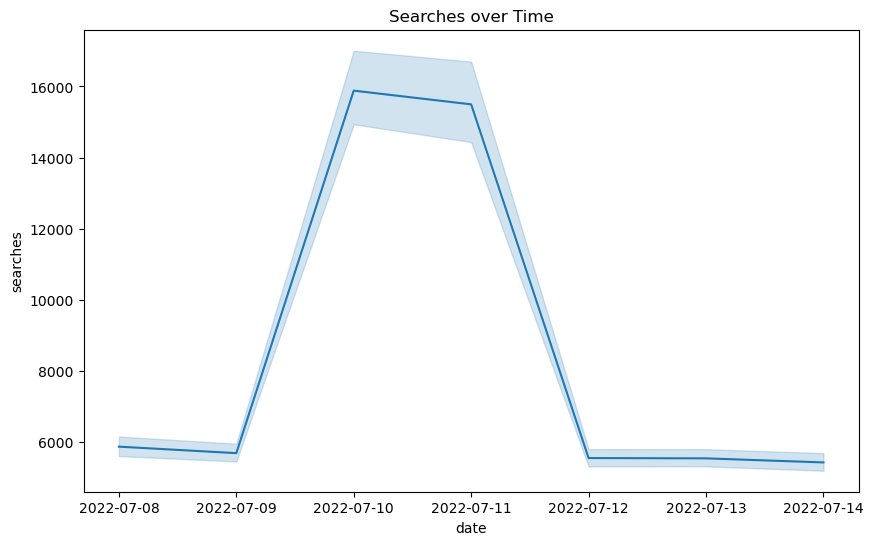

In [57]:
# Time Series Analysis
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='searches', data=data)
plt.title('Searches over Time')
plt.show()

$\;\;\;\;\;\;$ 

The graph shows the number of searches over time from Friday, 2022-07-08 to Thursday, 2022-07-14. There are two peaks, one on Sunday, 2022-07-10 and one on Monday, 2022-07-11. This suggests that people are more likely to search for something on the weekends. The number of searches drops off sharply on Tuesday, 2022-07-12 and remains relatively low for the rest of the week. This is likely because people are back at work or school and have less time to search for things online.

Overall, the graph shows that the distribution of searches is not uniform throughout the week. 

Since we've identified a clear pattern related to the day of the week, let's include a categorical feature representing the day of the week

In [58]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data

,keyword_id,keyword_rank,date,searches,search_engine,day
0,338145,25218,2022-07-08,53000,0,8
1,366846,906743,2022-07-08,0,0,8
2,8590017696,136761,2022-07-08,7000,0,8
3,8590268435,60380,2022-07-08,20033,0,8
4,17179954797,239930,2022-07-08,2000,0,8
...,...,...,...,...,...,...
469303,283467963549,1396,2022-07-14,13000,25,14
469304,678604970059,5133,2022-07-14,3000,25,14
469305,2482491145775,3980,2022-07-14,7000,25,14
469306,2791728932601,6522,2022-07-14,1357,25,14


# Correlation Analysis


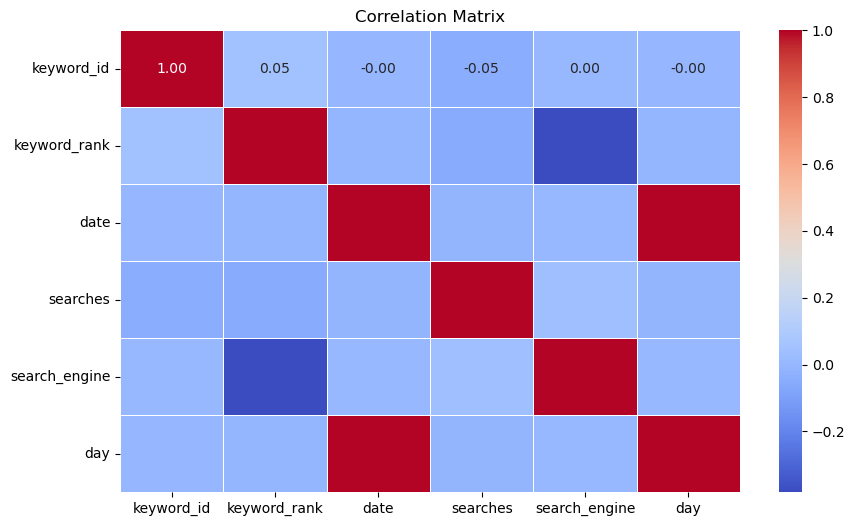

In [59]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


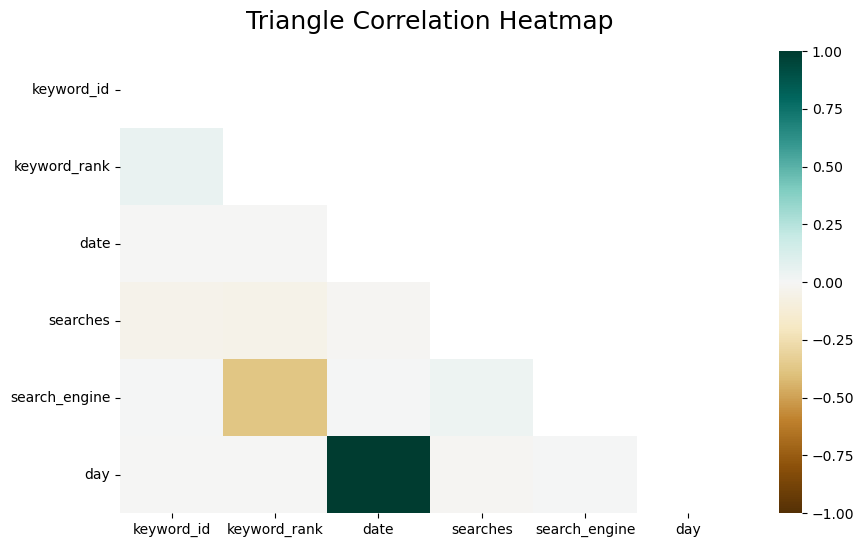

In [60]:
plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

A negative correlation between keyword_rank and search_engine suggests that as the rank of a keyword increases (i.e., a lower rank), it is associated with a specific search engine. In other words, certain search engines may tend to rank keywords lower or higher compared to others

it could also suggest that there is a tendency for keywords with lower ranks to be associated with a particular search engine, and vice versa.

Let's also visualize the number of searches per search engine as well as distribution of keyword Rank by Search Engine

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


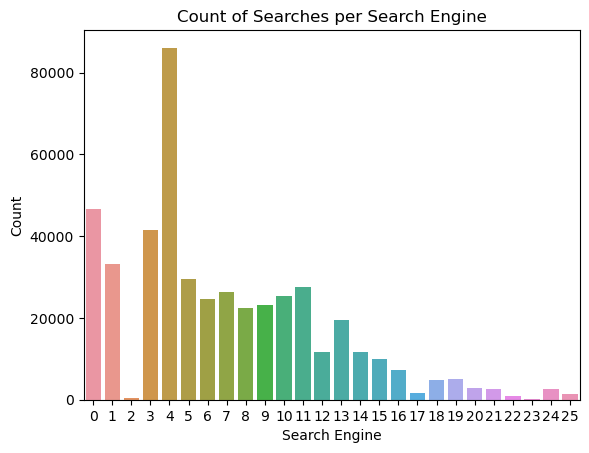

In [61]:
sns.countplot(x='search_engine', data=data)
plt.title('Count of Searches per Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Count')
plt.show()


/var/folders/_v/kqfqrzh174l0mmh_2bj_9gfc0000gn/T/ipykernel_11700/3443725144.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='search_engine', y='keyword_rank', data=data, ci=None, palette='viridis')
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

Text(0, 0.5, 'Average Keyword')

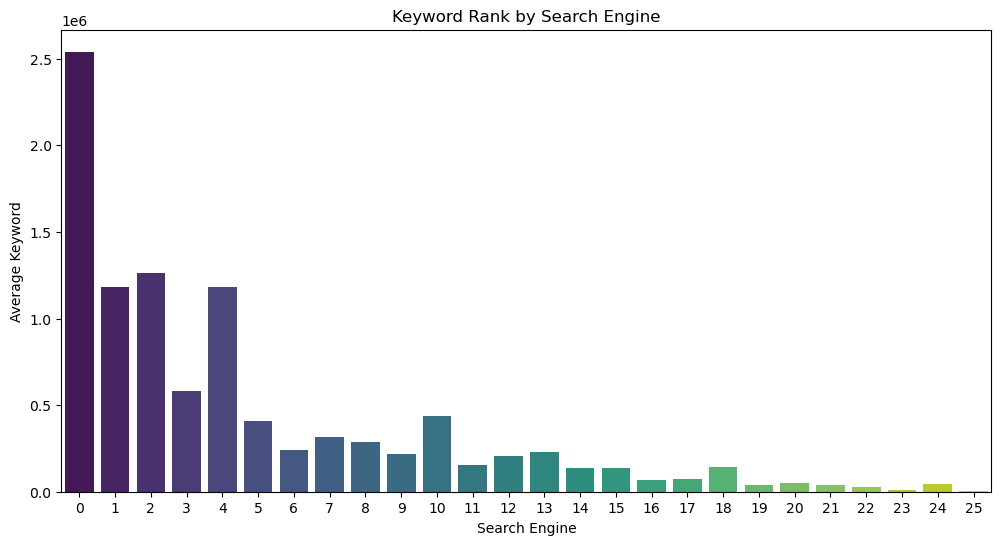

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'search_engine' is a categorical variable and 'keyword_rank' is a numerical variable
plt.figure(figsize=(12, 6))
sns.barplot(x='search_engine', y='keyword_rank', data=data, ci=None, palette='viridis')
plt.title('Keyword Rank by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Average Keyword')


$\;\;\;\;\;\;$ 

### 3. Feature Engineering &  Data Preprocessing

Create a feature indicating whether it's a peak day (midweek) based on your observation of a peak in searches

In [63]:
data['is_peak_day'] = data['date'].dt.weekday == 10  # observation from the graph


Create an interaction feature between the day of the week and the keyword rank. This can capture whether the impact of keyword rank on searches varies depending on the day of the week.


In [64]:
data['rank_day_interaction'] = data['keyword_rank'] * data['day']


$\;\;\;\;\;\;$ 

### 4.Split the data


In [65]:
# Features: 'keyword_rank', 'search_engine', 'day', 'is_peak_day'
# Target: 'searches'
X = data[['keyword_rank', 'search_engine', 'day', 'is_peak_day']]
y = data['searches']

In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Build the model:


### model choice & reasonning

Given the presence of correlated features, we can start with an ensemble model that handles non-linear relationships well. Random Forest Regressor is a good choice because it can handle correlated features effectively. It builds multiple decision trees and averages their predictions, reducing the impact of individual trees' biases. Random Forests also naturally captures non-linear relationships in the data, making them suitable when the relationships between features and the target variable are complex. Moreover, Random Forests are robust against overfitting, which is beneficial when dealing with correlated features that might introduce multicollinearity issues.


In [67]:

# Convert categorical variables to numerical representation
preprocessor = ColumnTransformer(
    transformers=[
        ('search_engine', OneHotEncoder(handle_unknown='ignore'), ['search_engine'])
    ],
    remainder='passthrough'
)


In [68]:

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [69]:

# Train the model
model.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:

# Make predictions on the test set
predictions = model.predict(X_test)


### Model  Evaluation and  conclusions:
#### For a regression task (predicting the number of searches), we should evaluate the:
- MSE penalizes larger errors more heavily. For regression tasks, minimizing MSE is a common goal.
- MAE provides a more interpretable metric than MSE, as it is in the same unit as the target variable.



In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 470034.5475235

MSE is a measure of the average squared difference between the actual and predicted values, and a high MSE indicates that the model is not accurately capturing the variability in your data.

### Next Steps: 

Feature Engineering:

Continue refining feature engineering based on insights from feature importance analysis and domain knowledge. Explore additional features or transformations that might improve model performance.
Hyperparameter Tuning:

Experiment with hyperparameter tuning for the Random Forest Regressor or explore alternative models to optimize predictive performance. Techniques like GridSearchCV or randomized search can help identify optimal hyperparameter values.
Cross-Validation:

Implement cross-validation to obtain a more robust estimate of the model's performance. This ensures that the model generalizes well to new data.

Further Analysis:

Conduct further analyses to understand the practical implications of the negative correlation between keyword_rank and search_engine. Investigate whether specific search engines favor certain types of keywords or if there are notable patterns in keyword rankings.
